In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
df = pd.read_excel('ozon_data.xlsx')

In [4]:
# X = df.iloc[:, :-1] 
# y = df.iloc[:, -1] 

X = df.drop(columns=['Decmc']) 
y = df['Decmc'] 

In [5]:
"""
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, edgecolor='k')
plt.title('Hedef Değişken Dağılımı')
plt.xlabel('Değer')
plt.ylabel('Frekans')
plt.show()
"""

"\nplt.figure(figsize=(10, 6))\nplt.hist(y, bins=30, edgecolor='k')\nplt.title('Hedef Değişken Dağılımı')\nplt.xlabel('Değer')\nplt.ylabel('Frekans')\nplt.show()\n"

In [6]:
scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state = 23)

In [8]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 23)

In [9]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [10]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=23), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [11]:
best_model = grid_search.best_estimator_
print(grid_search.best_params_)

{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [12]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [13]:
rmse_train = root_mean_squared_error(y_train, y_train_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

In [14]:
print("Eğitim verileri için metrikler")
print(f'Eğitim RMSE: {rmse_train}')
print(f'Eğitim MAPE: {mape_train}')
print(f'Eğitim R^2: {r2_train}')
print(f'Eğitim MSE: {mse_train}')
print('---------------------------------')
print("Test verileri için metrikler")
print(f'Test R^2: {r2_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test MAPE: {mape_test}')
print(f'Test MSE: {mse_test}')

Eğitim verileri için metrikler
Eğitim RMSE: 0.3764323785922638
Eğitim MAPE: 5.257760570801469
Eğitim R^2: 0.9969932137300717
Eğitim MSE: 0.14170133565262943
---------------------------------
Test verileri için metrikler
Test R^2: 0.9940341258400295
Test RMSE: 0.49951077529602556
Test MAPE: 5.549730748180774
Test MSE: 0.24951101463683656


(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30')])

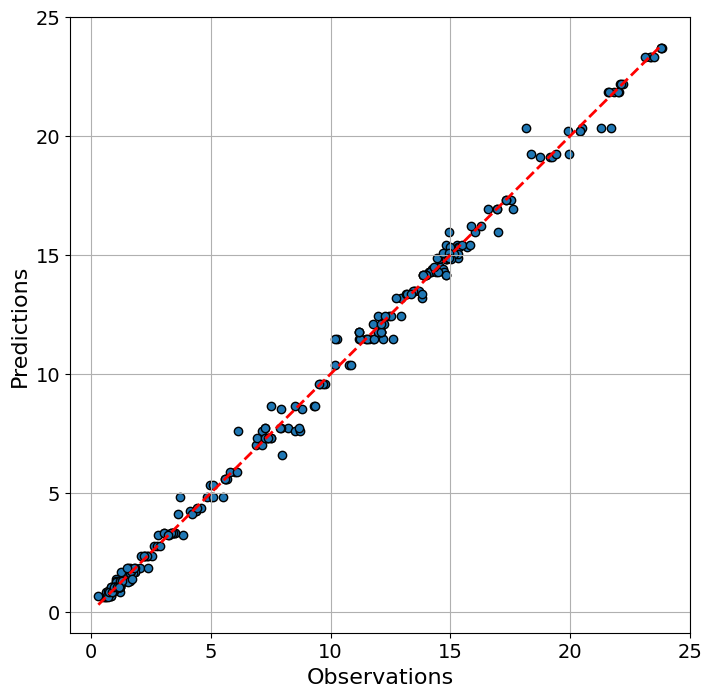

In [15]:
plt.figure(figsize=(8, 8))
plt.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=2)
plt.xlabel('Observations', fontsize=16) 
plt.ylabel('Predictions', fontsize=16) 
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 [Text(0, -5.0, '−5'),
  Text(0, 0.0, '0'),
  Text(0, 5.0, '5'),
  Text(0, 10.0, '10'),
  Text(0, 15.0, '15'),
  Text(0, 20.0, '20'),
  Text(0, 25.0, '25'),
  Text(0, 30.0, '30')])

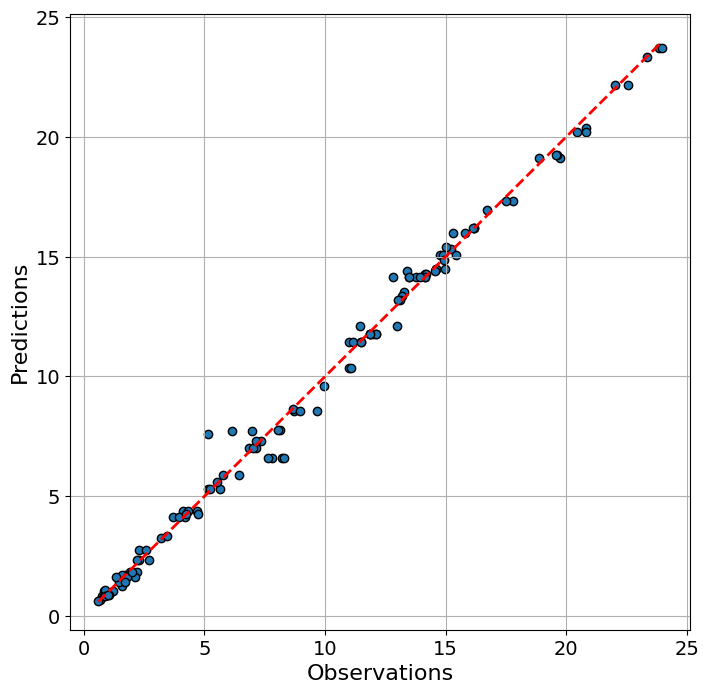

In [16]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Observations', fontsize=16) 
plt.ylabel('Predictions', fontsize=16) 
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)